# start

In [65]:
PRFX = 'MelPrp0628B1'

In [66]:
MAXSZ = 512

# setup

In [67]:
from pathlib import Path
import pickle
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import datetime
def dtnow(): return datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')


In [68]:
p_cmp = '../input/siim-isic-melanoma-classification'
p_19 = '../input/andrewmvd--isic-2019'
p_out = '../output/{PRFX}'
p_out = f'../output/{PRFX}'; Path(p_out).mkdir(exist_ok=True,parents=True)

# eda

In [99]:
mkdir -p $p_out/siim-isic-melanoma-classification/jpeg/train

In [100]:
mkdir -p $p_out/siim-isic-melanoma-classification/jpeg/tests

In [101]:
mkdir -p $p_out/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input

In [72]:
dftrain=pd.read_csv(f'{p_cmp}/train.csv')
dftrain['im_pth'] = f'{p_cmp}/jpeg/train/'+dftrain.image_name+'.jpg'
dftrain.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,im_pth
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,../input/siim-isic-melanoma-classification/jpe...
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,../input/siim-isic-melanoma-classification/jpe...
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,../input/siim-isic-melanoma-classification/jpe...
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,../input/siim-isic-melanoma-classification/jpe...
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,../input/siim-isic-melanoma-classification/jpe...


In [73]:
dftest=pd.read_csv(f'{p_cmp}/test.csv')
dftest['im_pth'] = f'{p_cmp}/jpeg/test/'+dftest.image_name+'.jpg'
dftest.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,im_pth
0,ISIC_0052060,IP_3579794,male,70.0,NaN,../input/siim-isic-melanoma-classification/jpe...
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,../input/siim-isic-melanoma-classification/jpe...
2,ISIC_0058510,IP_7960270,female,55.0,torso,../input/siim-isic-melanoma-classification/jpe...
3,ISIC_0073313,IP_6375035,female,50.0,torso,../input/siim-isic-melanoma-classification/jpe...
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,../input/siim-isic-melanoma-classification/jpe...


In [74]:
df19=pd.read_csv(f'{p_19}/ISIC_2019_Training_GroundTruth.csv')
df19['im_pth'] = f'{p_19}/ISIC_2019_Training_Input/ISIC_2019_Training_Input/'+df19.image+'.jpg'
df19.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,im_pth
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../input/andrewmvd--isic-2019/ISIC_2019_Traini...
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../input/andrewmvd--isic-2019/ISIC_2019_Traini...
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../input/andrewmvd--isic-2019/ISIC_2019_Traini...
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../input/andrewmvd--isic-2019/ISIC_2019_Traini...
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../input/andrewmvd--isic-2019/ISIC_2019_Traini...


(3264, 2448)


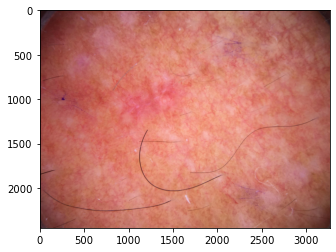

(1920, 1080)


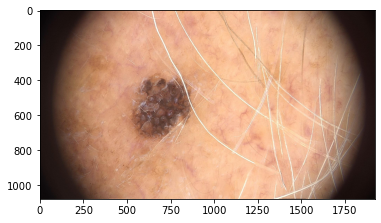

(600, 450)


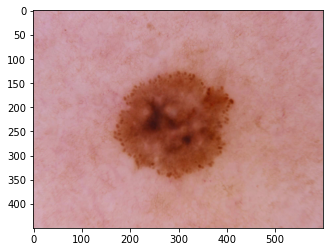

In [75]:
for df in [dftrain,dftest,df19]:
    fnm = np.random.choice(df.im_pth)
    im = Image.open(fnm)
    print(im.size)
    plt.imshow(im)
    plt.show()

(6000, 4000)

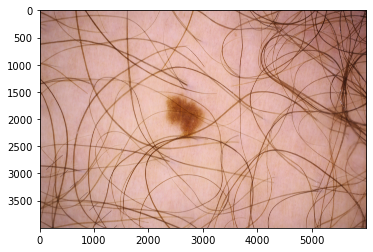

In [84]:
fnm = np.random.choice(dftrain.im_pth)
im = Image.open(fnm)
plt.imshow(im)
im.size

In [85]:
w,h=im.size
w,h

(6000, 4000)

In [86]:
def maybe_resize(im, maxsz=MAXSZ):
    w,h=im.size
    if max(w,h)<=maxsz: return im
    elif w>maxsz: 
        w_new = maxsz
        h_new = int(maxsz*h/w)
    else:
        h_new = maxsz
        w_new = int(maxsz*w/h)
    return im.resize((w_new,h_new))

(512, 341)

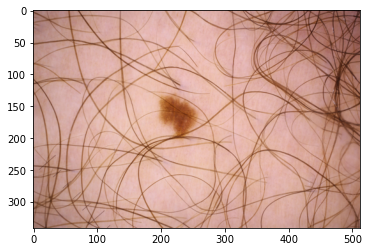

In [87]:
im_new = maybe_resize(im)
plt.imshow(im_new)
im_new.size

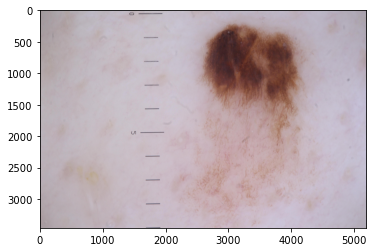

(5184, 3456)
(512, 341)


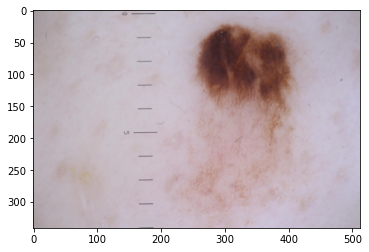

In [88]:
fnm = np.random.choice(dftrain.im_pth)
im = Image.open(fnm)
plt.imshow(im);
plt.show()
print(im.size)
im_new = maybe_resize(im)
plt.imshow(im_new)
print(im_new.size)

# run

In [107]:
for df in [dftrain,dftest,df19]:
    display(df.head(3))
    for i, fnm in enumerate(df.im_pth.values):
        if i%1000==0: print(dtnow(), f'{i}/{len(df)}')
        im = Image.open(fnm)
        im_new = maybe_resize(im)
        fnm_new = fnm.replace('../input', p_out)
        im_new.save(fnm_new)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,im_pth
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,../input/siim-isic-melanoma-classification/jpe...
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,../input/siim-isic-melanoma-classification/jpe...
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,../input/siim-isic-melanoma-classification/jpe...


2020-06-29 03:11:41 0/33126
2020-06-29 03:46:34 1000/33126
2020-06-29 04:19:47 2000/33126
2020-06-29 04:52:34 3000/33126
2020-06-29 05:25:35 4000/33126
2020-06-29 05:57:22 5000/33126
2020-06-29 06:27:28 6000/33126
2020-06-29 06:57:16 7000/33126
2020-06-29 07:27:21 8000/33126
2020-06-29 07:58:04 9000/33126
2020-06-29 08:28:59 10000/33126
2020-06-29 08:59:13 11000/33126
2020-06-29 09:29:14 12000/33126
2020-06-29 09:49:34 13000/33126
2020-06-29 10:10:22 14000/33126
2020-06-29 10:30:22 15000/33126
2020-06-29 10:51:58 16000/33126
2020-06-29 11:12:29 17000/33126
2020-06-29 11:31:19 18000/33126
2020-06-29 11:52:03 19000/33126
2020-06-29 12:12:12 20000/33126
2020-06-29 12:31:42 21000/33126
2020-06-29 12:51:43 22000/33126
2020-06-29 13:11:58 23000/33126
2020-06-29 13:32:45 24000/33126
2020-06-29 14:03:59 25000/33126
2020-06-29 14:34:44 26000/33126
2020-06-29 15:05:18 27000/33126
2020-06-29 15:34:12 28000/33126
2020-06-29 15:54:41 29000/33126


KeyboardInterrupt: 